<a href="https://colab.research.google.com/github/jssaini7815/Malaria-cell-image/blob/main/Malaria_cell_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

In [79]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"
# /content/drive/My Drive/kaggle is the path where kaggle.json is present in 

In [80]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 659M/675M [00:06<00:00, 162MB/s]
100% 675M/675M [00:06<00:00, 111MB/s]


In [81]:
!ls

app.py	     cell-images-for-detecting-malaria.zip  my_model2.hdf5  sample_data
cell_images  drive				    nohup.out


In [82]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

# Listing the files in the directory

In [83]:
print(os.listdir('/content/cell_images'))

['Uninfected', 'Parasitized', 'cell_images']


In [84]:
parasitized_cells=os.listdir('/content/cell_images/Parasitized')
uninfected_cells=os.listdir('/content/cell_images/Uninfected')

In [85]:
parasitized_cells

['C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C184P145ThinF_IMG_20151203_103824_cell_133.png',
 'C99P60ThinF_IMG_20150918_141001_cell_101.png',
 'C116P77ThinF_IMG_20150930_172112_cell_78.png',
 'C84P45ThinF_IMG_20150818_101412_cell_99.png',
 'C99P60ThinF_IMG_20150918_141620_cell_53.png',
 'C122P83ThinF_IMG_20151002_145014_cell_171.png',
 'C93P54ThinF_IMG_20150821_162641_cell_219.png',
 'C84P45ThinF_IMG_20150818_102009_cell_4.png',
 'C132P93ThinF_IMG_20151004_151733_cell_189.png',
 'C176P137NThinF_IMG_20151201_122811_cell_162.png',
 'C91P52ThinF_IMG_20150821_124311_cell_27.png',
 'C99P60ThinF_IMG_20150918_141520_cell_101.png',
 'C59P20thinF_IMG_20150803_115303_cell_42.png',
 'C68P29N_ThinF_IMG_20150819_134504_cell_169.png',
 'C93P54ThinF_IMG_20150821_164024_cell_210.png',
 'C188P149ThinF_IMG_20151203_134319_cell_182.png',
 'C176P137NThinF_IMG_20151201_120845_cell_140.png',
 'C48P9thinF_IMG_20150721_164129_cell_7.png',
 'C91P52ThinF_IMG_20150821_124311_cell_14.png',
 'C51AP12thinF_

#Data Visualisation

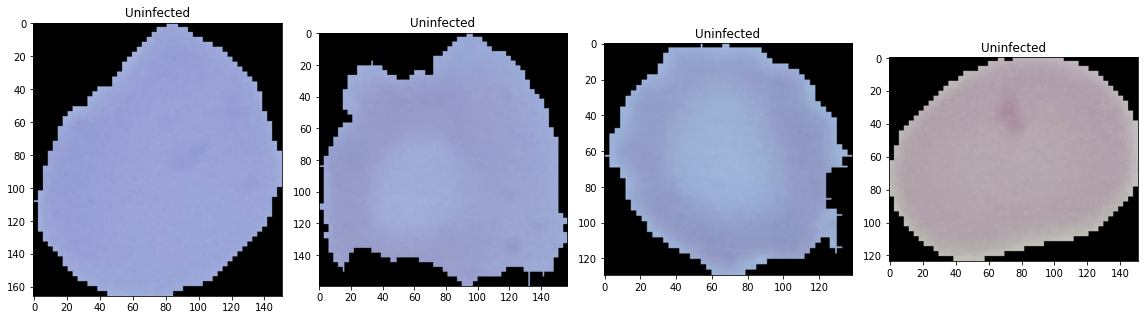

In [86]:
plt.figure(figsize=(16,16))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('/content/cell_images/Uninfected'+'/'+ uninfected_cells[i])
    plt.title('Uninfected')
    plt.imshow(img)
    plt.tight_layout()
plt.show()

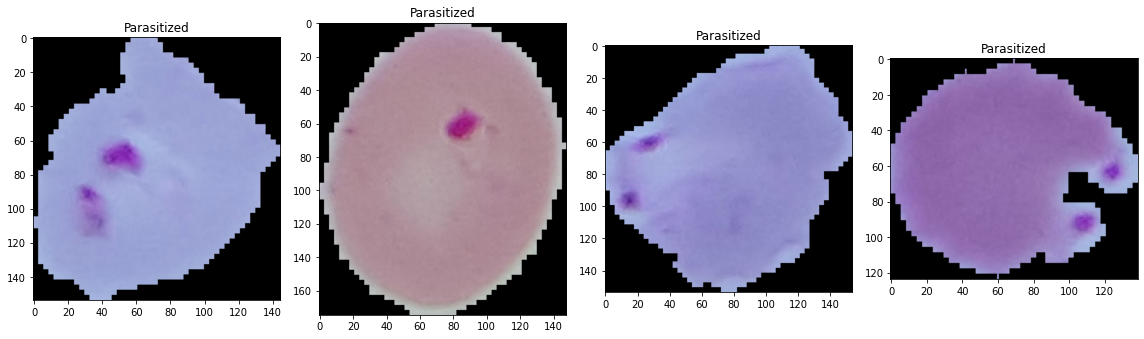

In [87]:
plt.figure(figsize=(16,16))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('/content/cell_images/Parasitized'+'/'+ parasitized_cells[i])
    plt.title('Parasitized')
    plt.imshow(img)
    plt.tight_layout()
plt.show()


#Data Augmentation

In [88]:
datagen=ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

train_datagen=datagen.flow_from_directory(directory='/content/cell_images/cell_images',
                             target_size=(50,50),class_mode='binary',batch_size=32,
                                         subset='training')
val_datagen=datagen.flow_from_directory(directory='/content/cell_images/cell_images',
                                       target_size=(50,50),class_mode='binary',subset='validation')


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# Deep Learning Model

#Sigmoid function as activation function

In [89]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='sigmoid',input_shape=(50,50,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='sigmoid'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='sigmoid'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='sigmoid'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

# Adadelta optimizer 

In [90]:
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)

In [92]:
history=model.fit_generator(generator=train_datagen,steps_per_epoch=len(train_datagen),
                          epochs=20,validation_data=val_datagen,
                          validation_steps=len(val_datagen),
                          callbacks=[early_stopping]) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
689/689 [==============================] - 28s 40ms/step - loss: 0.8609 - accuracy: 0.5020 - val_loss: 0.7954 - val_accuracy: 0.5000
Epoch 2/20
689/689 [==============================] - 27s 39ms/step - loss: 0.8506 - accuracy: 0.4941 - val_loss: 0.7704 - val_accuracy: 0.5000
Epoch 3/20
689/689 [==============================] - 27s 40ms/step - loss: 0.8167 - accuracy: 0.4986 - val_loss: 0.7510 - val_accuracy: 0.5000
Epoch 4/20
689/689 [==============================] - 27s 39ms/step - loss: 0.8050 - accuracy: 0.4936 - val_loss: 0.7359 - val_accuracy: 0.5000
Epoch 5/20
689/689 [==============================] - 27s 39ms/step - loss: 0.7907 - accuracy: 0.4978 - val_loss: 0.7245 - val_accuracy: 0.5000
Epoch 6/20
689/689 [==============================] - 27s 39ms/step - loss: 0.7766 - accuracy: 0.5037 - val_loss: 0.7159 - val_accuracy: 0.5000
Epoch 7/20
689/689 [==============================] - 26s 38ms/step - loss: 0.7680 - accuracy: 0.5013 - val_loss: 0.7094 - val_accuracy:

#Using ReLU and softmax function as activation function





In [93]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='softmax'))

In [94]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)


In [96]:
history=model.fit_generator(generator=train_datagen,steps_per_epoch=len(train_datagen),
                          epochs=10,validation_data=val_datagen,
                          validation_steps=len(val_datagen),
                          ) #callbacks=[early_stopping]

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


689/689 [==============================] - 28s 39ms/step - loss: 0.4947 - accuracy: 0.5017 - val_loss: 0.1929 - val_accuracy: 0.5000
Epoch 2/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1587 - accuracy: 0.5003 - val_loss: 0.1616 - val_accuracy: 0.5000
Epoch 3/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1483 - accuracy: 0.4972 - val_loss: 0.1443 - val_accuracy: 0.5000
Epoch 4/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1355 - accuracy: 0.4995 - val_loss: 0.1534 - val_accuracy: 0.5000
Epoch 5/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1378 - accuracy: 0.4951 - val_loss: 0.1522 - val_accuracy: 0.5000
Epoch 6/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1205 - accuracy: 0.5020 - val_loss: 0.1796 - val_accuracy: 0.5000
Epoch 7/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1194 - accuracy: 0.5021 - val_loss: 0.1717 - val_accuracy: 0.5000
Epo

In [97]:
history=model.fit_generator(generator=train_datagen,steps_per_epoch=len(train_datagen),
                          epochs=10,validation_data=val_datagen,
                          validation_steps=len(val_datagen),
                          ) #callbacks=[early_stopping]

Epoch 1/20
  3/689 [..............................] - ETA: 22s - loss: 0.1458 - accuracy: 0.4375

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


689/689 [==============================] - 27s 39ms/step - loss: 0.1015 - accuracy: 0.5000 - val_loss: 0.1578 - val_accuracy: 0.5000
Epoch 2/20
689/689 [==============================] - 27s 39ms/step - loss: 0.0910 - accuracy: 0.5000 - val_loss: 0.1578 - val_accuracy: 0.5000
Epoch 3/20
689/689 [==============================] - 27s 39ms/step - loss: 0.0878 - accuracy: 0.5000 - val_loss: 0.1700 - val_accuracy: 0.5000
Epoch 4/20
689/689 [==============================] - 27s 39ms/step - loss: 0.0801 - accuracy: 0.5000 - val_loss: 0.1879 - val_accuracy: 0.5000
Epoch 5/20
689/689 [==============================] - 27s 39ms/step - loss: 0.0761 - accuracy: 0.5000 - val_loss: 0.1914 - val_accuracy: 0.5000
Epoch 6/20
689/689 [==============================] - 27s 39ms/step - loss: 0.0709 - accuracy: 0.5000 - val_loss: 0.2103 - val_accuracy: 0.5000
Epoch 7/20
689/689 [==============================] - 27s 39ms/step - loss: 0.0669 - accuracy: 0.5000 - val_loss: 0.2057 - val_accuracy: 0.5000
Epo

# ReLu and sigmoid as activation function

In [98]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [99]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [100]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)
  

In [101]:
history=model.fit_generator(generator=train_datagen,steps_per_epoch=len(train_datagen),
                          epochs=10,validation_data=val_datagen,
                          validation_steps=len(val_datagen),
                          callbacks=[early_stopping]) #

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
689/689 [==============================] - 28s 40ms/step - loss: 0.6415 - accuracy: 0.5922 - val_loss: 0.2112 - val_accuracy: 0.9279
Epoch 2/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1817 - accuracy: 0.9454 - val_loss: 0.1576 - val_accuracy: 0.9472
Epoch 3/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1543 - accuracy: 0.9519 - val_loss: 0.1598 - val_accuracy: 0.9463
Epoch 4/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1473 - accuracy: 0.9553 - val_loss: 0.1734 - val_accuracy: 0.9459


#Web App 

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [103]:
tf.keras.models.save_model(model,'my_model2.hdf5')


# Streamlit

In [104]:
!pip install streamlit

In [105]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model2.hdf5')
  return model
model = load_model()
st.write('''
         # Malaria cell classification
         '''
         )
file=st.file_uploader("Please upload an flower image",type=['jpg','png'])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data,model):
  size=(16,16)
  image=ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=img[np.newaxis,...]
  prediction=model.predict(img_reshape)
  return prediction

if file is None:
  st.text("Please upload an image file")
else:
  image=Image.open(file)
  st.image(image,use_column_width=True)
  predictions=import_and_predict(image,model)
  class_names=['Parasitized','Uninfected']
  strings='This image most likely is: ' +class_names[np.argmax(predictions)]
  st.success(string) 


Overwriting app.py


In [106]:
!ngrok authtoken 

NAME:
   authtoken - save authtoken to configuration file

USAGE:
   ngrok authtoken [command options] [arguments...]

DESCRIPTION:
   The authtoken command modifies your configuration file to include
   the specified authtoken. By default, this configuration file is located
   at $HOME/.ngrok2/ngrok.yml

   The ngrok.com service requires that you sign up for an account to use
   many advanced service features. In order to associate your client with
   an account, it must pass a secret token to the ngrok.com service when it
   starts up. Instead of passing this authtoken on every invocation, you may
   use this command to save it into your configuration file so that your
   client always authenticates you properly.

EXAMPLE:
    ngrok authtoken BDZIXnhJt2HNWLXyQ5PM_qCaBq0W2sNFcCa0rfTZd

OPTIONS:
   --config 		save in this config file, default: ~/.ngrok2/ngrok.yml
   --log "false"	path to log file, 'stdout', 'stderr' or 'false'
   --log-format "term"	log record format: 'term', 'logfmt',

In [107]:
!pip install pyngrok

In [108]:
!ngrok authtoken 1ryuL5nhj7faOODFPvZyZ6YnIDq_2qhq5G9BJjNUie3E3ihQk

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [109]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [110]:
from pyngrok import ngrok

In [111]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [112]:
!pgrep streamlit

2632
2832
2977
4236


In [116]:
ngrok.kill() # when it will be used to show more than 4 connections, we will kill the connections due to free versions

In [117]:
url=ngrok.connect(port=8050)
#open a SSH tunnel
ssh_url=ngrok.connect(22,'tcp')
url

<NgrokTunnel: "http://c1d0889217c2.ngrok.io" -> "http://localhost:80">

In [118]:
!cat /content/nohup.out

2021-05-02 14:52:21.631809: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.199.173.175:8501

2021-05-02 14:52:23.149869: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-02 14:52:23.152156: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-02 14:52:23.158715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-02 14:52:23.159295: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 device